In [2]:
from __future__ import absolute_import, division, print_function
import pathlib
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.preprocessing import StandardScaler
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#need to download these files everytime
gc_burden_path = "gene_clinical_burden.csv" # generate by merge_two_files
gc_data = pd.read_csv(gc_burden_path, dtype = 'object')

hyp_path = "hyperparemter_data.csv" # generate by merge_two_files
hyp_data = pd.read_csv(hyp_path, dtype = 'object')

In [4]:
gc_data=gc_data.apply(pd.to_numeric)

In [5]:
# variables for pan cancer analysis
#will be used in manipulation for specific cancer type analysis as well
mat_data = gc_data.values.astype(float)
x_label = gc_data.columns
n = mat_data.shape[0]
d = mat_data.shape[1]
x = mat_data[:,:-1]

In [6]:
#ecdf
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(y)
count=ecdf(x[:,0])
x[:,0]=count
y = mat_data[:,-1]

In [7]:
#creating variable for specific cancer types
cancer_start = (np.where(x_label=='ACC'))[0][0]
cancer_end = np.where(x_label == 'UVM')[0][0]
cancer_names = x_label[cancer_start : cancer_end+1]
#cancer data is the data of each patient for each type of cancer
#ie does a patient have a certain cancer
cancer_data = x[:,cancer_start:cancer_end+1]

#nx produces the x dtaset for the cancer specific type by getting rid of the cancer classifications
nx = x
nx = np.delete(nx,list(range(cancer_start, cancer_end+1)), axis=1)
nx_label = x_label
nx_label = np.delete(nx_label, list(range(cancer_start, cancer_end+1)))

In [8]:
#hyperamatyer variable needed for the model
Alpha=hyp_data['alpha']
l1= hyp_data['l1_ratio']
#turn values into floats
l1=pd.to_numeric(l1, errors='coerce')
Alpha=pd.to_numeric(Alpha, errors='coerce')

In [9]:
for i in range(len(cancer_names)):
  x_=nx[np.where(cancer_data[:,i]==1)]
  y_=y[np.where(cancer_data[:,i]==1)] 
  print(cancer_names[i])
  print(x_.shape)

ACC
(41, 308)
BLCA
(385, 308)
BRCA
(844, 308)
CESC
(230, 308)
CHOL
(34, 308)
COAD
(268, 308)
ESCA
(159, 308)
GBM
(294, 308)
HNSC
(473, 308)
KICH
(42, 308)
KIRC
(308, 308)
KIRP
(198, 308)
LGG
(495, 308)
LIHC
(329, 308)
LUAD
(423, 308)
LUSC
(356, 308)
MESO
(67, 308)
OV
(372, 308)
PAAD
(151, 308)
PCPG
(83, 308)
PRAD
(97, 308)
READ
(76, 308)
SARC
(165, 308)
SKCM
(436, 308)
STAD
(358, 308)
TGCT
(69, 308)
THCA
(314, 308)
UCEC
(483, 308)
UCS
(56, 308)
UVM
(55, 308)


This plotting for all cancer types


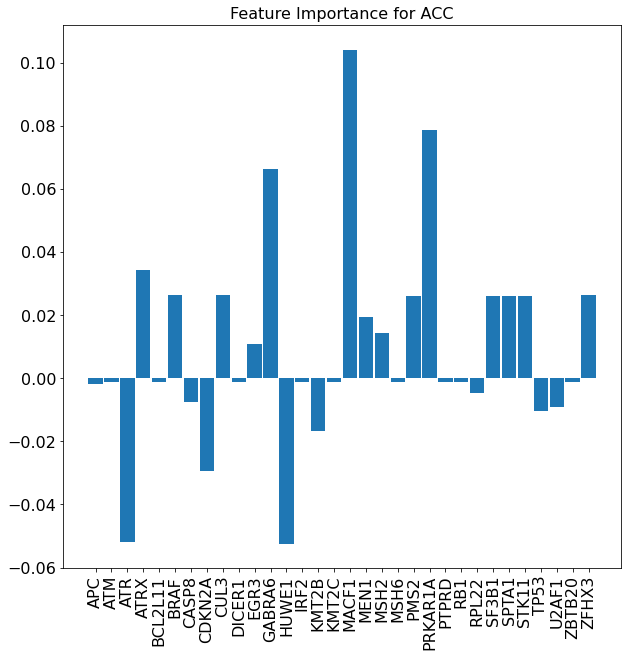

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
cancer_names[0]
from sklearn.model_selection import train_test_split
x_=nx[np.where(cancer_data[:,0]==1)]
y_=y[np.where(cancer_data[:,0]==1)] 
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.25)
enet_regr= ElasticNet( l1_ratio=l1[0],random_state=0, max_iter=10000, alpha=Alpha[0])
model_=enet_regr.fit(X_train, y_train)
y_pred = model_.predict(X_test)
cancer_coef_ = np.transpose(enet_regr.coef_)
cancer_abs_coef_= abs(cancer_coef_)
coef=[]
feat=[]
name=cancer_names[0]
for i in range(len(cancer_coef_)):
    if cancer_coef_[i] >0.001 or cancer_coef_[i] <-0.001:
      coef.append(cancer_coef_[i])
      feat.append(nx_label[i])
bar_plot=plt.figure(figsize=(10, 10))
indices = np.arange(len(feat))
width = 0.9
# Plotting
plt.bar(indices, coef, width=width)

plt.xticks(ticks=indices, labels=feat)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("Features",fontsize=16)
#plt.ylabel("",fontsize=16)
plt.title("Feature Importance for ACC",fontsize=16)
plt.savefig('ACC_Barplot.png')
plt.show()
files.download('ACC_Barplot.png')

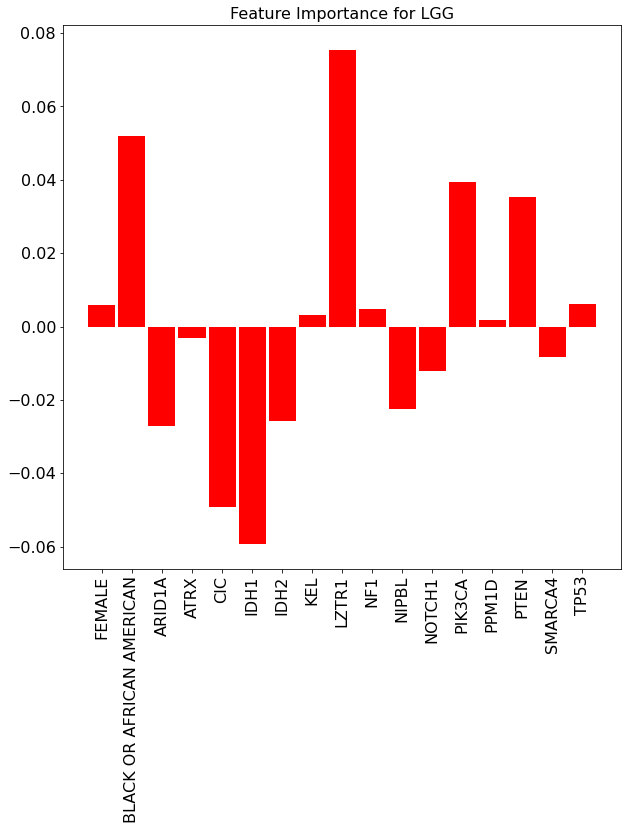

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
from sklearn.model_selection import train_test_split
x_=nx[np.where(cancer_data[:,12]==1)]
y_=y[np.where(cancer_data[:,12]==1)] 
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.25)
enet_regr= ElasticNet( l1_ratio=l1[12],random_state=0, max_iter=10000, alpha=Alpha[12])
model_=enet_regr.fit(X_train, y_train)
y_pred = model_.predict(X_test)
cancer_coef_ = np.transpose(enet_regr.coef_)
cancer_abs_coef_= abs(cancer_coef_)
coef=[]
feat=[]
#name=cancer_names[12]
for i in range(len(cancer_coef_)):
    if cancer_coef_[i] >0.001 or cancer_coef_[i] <-0.001:
      coef.append(cancer_coef_[i])
      feat.append(nx_label[i])
bar_plot=plt.figure(figsize=(10, 10))
indices = np.arange(len(feat))
width = 0.9
# Plotting
plt.bar(indices, coef, width=width, color='red')

plt.xticks(ticks=indices, labels=feat)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("Features",fontsize=16)
#plt.ylabel("",fontsize=16)
plt.title("Feature Importance for LGG",fontsize=16)
plt.savefig('LGG_Barplot.png')
plt.show()
files.download('LGG_Barplot.png')

In [10]:

KICH=cancer_names[9]
MESO=cancer_names[16]
UVM=cancer_names[-1]
cancer_names

Index(['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'ESCA', 'GBM', 'HNSC',
       'KICH', 'KIRC', 'KIRP', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV',
       'PAAD', 'PCPG', 'PRAD', 'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA',
       'UCEC', 'UCS', 'UVM'],
      dtype='object')

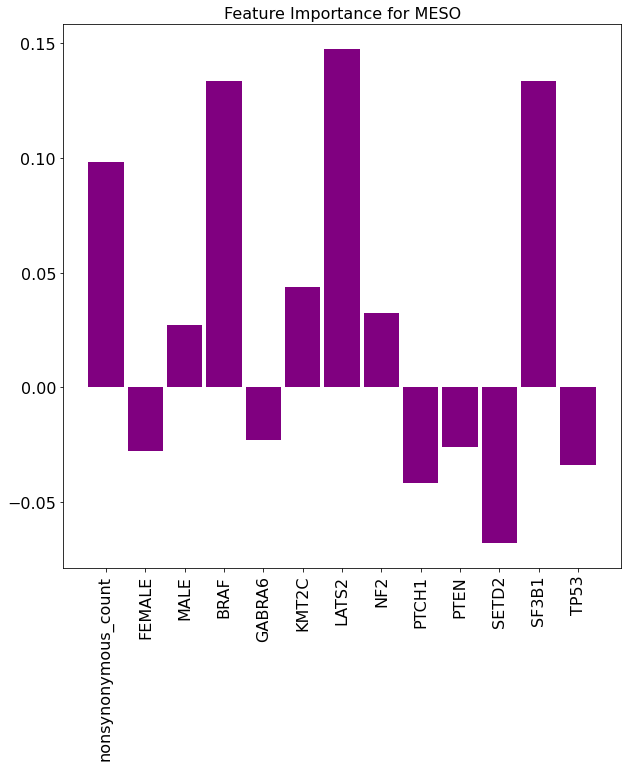

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
from sklearn.model_selection import train_test_split
x_=nx[np.where(cancer_data[:,16]==1)]
y_=y[np.where(cancer_data[:,16]==1)] 
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.25)
enet_regr= ElasticNet( l1_ratio=l1[16],random_state=0, max_iter=10000, alpha=Alpha[16])
model_=enet_regr.fit(X_train, y_train)
y_pred = model_.predict(X_test)
cancer_coef_ = np.transpose(enet_regr.coef_)
cancer_abs_coef_= abs(cancer_coef_)
coef=[]
feat=[]
for i in range(len(cancer_coef_)):
    if cancer_coef_[i] >0.001 or cancer_coef_[i] <-0.001:
      coef.append(cancer_coef_[i])
      feat.append(nx_label[i])
bar_plot=plt.figure(figsize=(10, 10))
indices = np.arange(len(feat))
width = 0.9
# Plotting
plt.bar(indices, coef, width=width, color='purple')

plt.xticks(ticks=indices, labels=feat)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("Features",fontsize=16)
#plt.ylabel("",fontsize=16)
plt.title("Feature Importance for MESO",fontsize=16)
plt.savefig('MESO_Barplot.png')
plt.show()
files.download('MESO_Barplot.png')

In [ ]:

from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
def plot_feat(cancer_num):
  cancer_names[cancer_num]
  x_=nx[np.where(cancer_data[:,cancer_num]==1)]
  y_=y[np.where(cancer_data[:,cancer_num]==1)] 
  X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.25)
  enet_regr= ElasticNet( l1_ratio=l1[cancer_num],random_state=0, max_iter=10000, alpha=Alpha[cancer_num])
  model_=enet_regr.fit(X_train, y_train)
  y_pred = model_.predict(X_test)
  cancer_coef_ = np.transpose(enet_regr.coef_)
  cancer_abs_coef_= abs(cancer_coef_)
  coef=[]
  feat=[]
  name=cancer_names[cancer_num]
  for i in range(len(cancer_coef_)):
      if cancer_coef_[i] >0.001 or cancer_coef_[i] <-0.001:
        coef.append(cancer_coef_[i])
        feat.append(nx_label[i])
  fig = go.Figure()
  fig.add_trace(go.Bar(
    y=coef,
    x=feat,
    orientation='v',
    marker=dict(
        color='rgba(46, 108, 265, 0.6)',
        line=dict(color='rgba(46, 108, 265, 1.0)', width=1))))
  fig.update_layout(
      title={
        'text': "Important Features of "+ str(name),
        'y':1,
        'x':0.5},
      xaxis_title="Feature Importance",
      yaxis_title="Features",
      font=dict(
          family="Courier New, monospace",
          size=10,
          color="Black"))
  
  fig.show()